In [59]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

In [75]:
modelfolder='cfdnetplus_models/model1/'
mainfolder='airfoil2d/airFoil_400/'
data=np.load(mainfolder+'input.npy')
normal=np.load(modelfolder+'normal.npy')

titles= ['U_x','U_y','U_z','p','nu_t','nu_Tilda']

In [76]:
print(normal)

[[[[4.49073389e+03 4.49073389e+03 4.49073389e+03 4.06376920e+07
    1.24413147e+02 1.24413147e+02]]]]


In [77]:
model = tf.keras.models.load_model(modelfolder)

In [78]:
prediction=model.predict(data*1/normal)

1/1 [==============================] - 0s 100ms/step


In [79]:
prediction=prediction*normal


In [80]:
np.save(mainfolder+'pred',prediction)

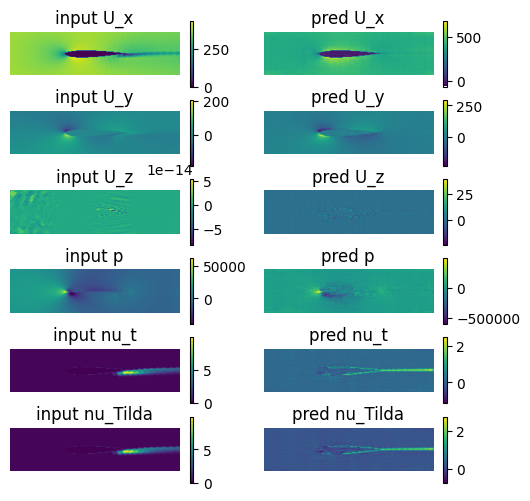

In [81]:
#print(test_data.shape)
n=0
fig = plt.figure(figsize=(6, 6))
[a,b,c,d]=data.shape
titles= ['U_x','U_y','U_z','p','nu_t','nu_Tilda']

for i in range(d):
    fig.add_subplot(d, 2, i*2+1)
    plt.imshow(data[n,:,:,i])
    plt.title('input ' +titles[i])
    plt.axis('off')
    plt.colorbar()
    
    fig.add_subplot(d, 2, i*2+2)
    plt.imshow(prediction[n,:,:,i])
    plt.title('pred '+titles[i])
    plt.axis('off')
    plt.colorbar()
    #print(i)

plt.show()